In [1]:
#Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Food Delivery Costs.csv')
data.head(5)

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [3]:
data.set_index('Order ID',inplace = True)

In [4]:
data.sample(5)

,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
Order ID,,,,,,,,,,,
545,C1133,R2091,2024-02-01 11:16:19,2024-02-01 11:51:19,1923,40,Cash on Delivery,50 off Promo,61,24,0
94,C9392,R2939,2024-01-29 21:00:38,2024-01-29 21:33:38,808,30,Cash on Delivery,5% on App,165,35,0
444,C3504,R2936,2024-01-01 10:00:35,2024-01-01 11:47:35,1199,0,Credit Card,NaN,68,25,0
86,C6618,R2260,2024-01-01 03:21:55,2024-01-01 04:53:55,1818,50,Digital Wallet,5% on App,196,42,0
631,C8939,R2885,2024-02-07 23:56:12,2024-02-08 01:45:12,1478,40,Cash on Delivery,NaN,143,43,100


In [5]:
data.columns

Index(['Customer ID', 'Restaurant ID', 'Order Date and Time',
       'Delivery Date and Time', 'Order Value', 'Delivery Fee',
       'Payment Method', 'Discounts and Offers', 'Commission Fee',
       'Payment Processing Fee', 'Refunds/Chargebacks'],
      dtype='object')

In [6]:
data.dtypes

,0
Customer ID,object
Restaurant ID,object
Order Date and Time,object
Delivery Date and Time,object
Order Value,int64
Delivery Fee,int64
Payment Method,object
Discounts and Offers,object
Commission Fee,int64
Payment Processing Fee,int64


In [4]:
data['Order Date and Time'] = pd.to_datetime(data['Order Date and Time'])
data['Delivery Date and Time'] = pd.to_datetime(data['Delivery Date and Time'])
print(data['Delivery Date and Time'].dtypes)
print(data['Order Date and Time'].dtypes)

datetime64[ns]
datetime64[ns]


In [5]:
data['Order Date'] = data['Order Date and Time'].dt.date
data['Order Time'] = data['Order Date and Time'].dt.time
data['Delivery Date'] = data['Delivery Date and Time'].dt.date
data['Delivery Time'] = data['Delivery Date and Time'].dt.time

In [6]:
data.drop(['Customer ID','Restaurant ID','Order Date and Time','Delivery Date and Time',],axis = 1,inplace = True)

In [7]:
data.sample(5)

,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Order Date,Order Time,Delivery Date,Delivery Time
Order ID,,,,,,,,,,,
241,1874,20,Cash on Delivery,15% New User,126,35,0,2024-01-17,10:08:17,2024-01-17,11:05:17
824,628,40,Credit Card,NaN,69,43,0,2024-01-27,02:02:02,2024-01-27,02:49:02
632,1873,0,Digital Wallet,15% New User,81,42,0,2024-01-04,12:30:24,2024-01-04,14:01:24
159,1187,20,Cash on Delivery,15% New User,103,37,50,2024-01-23,10:32:42,2024-01-23,11:54:42
393,587,30,Digital Wallet,10%,184,34,50,2024-02-06,16:55:20,2024-02-06,18:28:20


In [9]:
data_update = data[['Order Date', 'Order Time', 'Delivery Date', 'Delivery Time', 'Order Value', 'Delivery Fee', 'Payment Method', 'Discounts and Offers',
      'Commission Fee', 'Payment Processing Fee', 'Refunds/Chargebacks']]

In [10]:
data_update.head()

,Order Date,Order Time,Delivery Date,Delivery Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
Order ID,,,,,,,,,,,
1,2024-02-01,01:11:52,2024-02-01,02:39:52,1914,0,Credit Card,5% on App,150,47,0
2,2024-02-02,22:11:04,2024-02-02,22:46:04,986,40,Digital Wallet,10%,198,23,0
3,2024-01-31,05:54:35,2024-01-31,06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
4,2024-01-16,22:52:49,2024-01-16,23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
5,2024-01-29,01:19:30,2024-01-29,02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [14]:
data_update['Discounts and Offers'].value_counts()

,count
Discounts and Offers,
10%,233
50 off Promo,201
15% New User,198
5% on App,183


In [11]:
import re

def get_number(d):
  if isinstance(d,str):
    number = re.findall(r'[0-9]',d)
    return ''.join(number)
  return '0'

In [12]:
data_update['Discounts and Offers'] = data['Discounts and Offers'].apply(get_number)

In [13]:
data_update['Discounts and Offers'].value_counts()

,count
Discounts and Offers,
10,233
50,201
15,198
0,185
5,183


In [15]:
def get_discounted_amount(discount, order_value):
    if pd.isna(discount) or discount == 0:
        return 0
    elif discount == 50:
        return order_value - 50
    else:
        return (discount / 100) * order_value

In [23]:
def get_discounted_amount(n):
    if n == 0:
        return n
    elif n == 50:
        return n - 50
    else:
        return (n / 100)*n

In [14]:
data_update.head()

,Order Date,Order Time,Delivery Date,Delivery Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
Order ID,,,,,,,,,,,
1,2024-02-01,01:11:52,2024-02-01,02:39:52,1914,0,Credit Card,5,150,47,0
2,2024-02-02,22:11:04,2024-02-02,22:46:04,986,40,Digital Wallet,10,198,23,0
3,2024-01-31,05:54:35,2024-01-31,06:52:35,937,30,Cash on Delivery,15,195,45,0
4,2024-01-16,22:52:49,2024-01-16,23:38:49,1463,50,Cash on Delivery,0,146,27,0
5,2024-01-29,01:19:30,2024-01-29,02:48:30,1992,30,Cash on Delivery,50,130,50,0


In [17]:
data_update['Discounted Amount'] = data_update.apply(lambda row: get_discounted_amount(row['Discounts and Offers'], row['Order Value']), axis=1)

In [18]:
data_update.sample(3)

,Order Date,Order Time,Delivery Date,Delivery Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discounted Amount
Order ID,,,,,,,,,,,,
642,2024-01-31,03:50:31,2024-01-31,05:23:31,559,20,Credit Card,0,101,16,150,0.0
370,2024-01-25,04:42:25,2024-01-25,06:37:25,1205,30,Cash on Delivery,10,116,39,0,120.5
784,2024-01-13,04:18:50,2024-01-13,05:26:50,992,20,Credit Card,0,194,27,100,0.0


In [19]:
data_update['Total Cost'] = data_update['Order Value'] + data_update['Delivery Fee'] + data_update['Commission Fee'] + data_update['Payment Processing Fee'] - data_update['Discounted Amount']

In [20]:
data_update.tail()

,Order Date,Order Time,Delivery Date,Delivery Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discounted Amount,Total Cost
Order ID,,,,,,,,,,,,,
996,2024-01-14,05:57:00,2024-01-14,06:39:00,825,0,Digital Wallet,5,165,47,50,41.25,995.75
997,2024-01-28,08:50:43,2024-01-28,10:10:43,1627,50,Cash on Delivery,0,110,42,0,0.00,1829.00
998,2024-01-21,09:43:19,2024-01-21,10:44:19,553,20,Cash on Delivery,0,64,31,0,0.00,668.00
999,2024-01-30,22:23:38,2024-01-31,00:07:38,1414,0,Cash on Delivery,15,199,34,0,212.10,1434.90
1000,2024-01-08,14:46:43,2024-01-08,15:39:43,1657,20,Digital Wallet,15,180,27,100,248.55,1635.45


In [21]:
# data information

data_update.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order Date              1000 non-null   object 
 1   Order Time              1000 non-null   object 
 2   Delivery Date           1000 non-null   object 
 3   Delivery Time           1000 non-null   object 
 4   Order Value             1000 non-null   int64  
 5   Delivery Fee            1000 non-null   int64  
 6   Payment Method          1000 non-null   object 
 7   Discounts and Offers    1000 non-null   int64  
 8   Commission Fee          1000 non-null   int64  
 9   Payment Processing Fee  1000 non-null   int64  
 10  Refunds/Chargebacks     1000 non-null   int64  
 11  Discounted Amount       1000 non-null   float64
 12  Total Cost              1000 non-null   float64
dtypes: float64(2), int64(6), object(5)
memory usage: 109.4+ KB


In [22]:
# Null Values

data_update.isna().sum().sort_values()

,0
Order Date,0
Order Time,0
Delivery Date,0
Delivery Time,0
Order Value,0
Delivery Fee,0
Payment Method,0
Discounts and Offers,0
Commission Fee,0
Payment Processing Fee,0


In [23]:
#Duplicated Values

data_update.duplicated().sum()

0

In [24]:
# Basic Statistics

data_update.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Order Date,1000,38,2024-01-13,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order Time,1000,996,04:21:19,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delivery Date,1000,39,2024-01-13,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delivery Time,1000,994,06:36:39,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order Value,1000.0,NaN,NaN,NaN,1053.969,530.975339,104.0,597.75,1038.5,1494.0,1995.0
Delivery Fee,1000.0,NaN,NaN,NaN,28.62,16.958278,0.0,20.0,30.0,40.0,50.0
Payment Method,1000,3,Cash on Delivery,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Discounts and Offers,1000.0,NaN,NaN,NaN,16.265,17.626272,0.0,5.0,10.0,15.0,50.0
Commission Fee,1000.0,NaN,NaN,NaN,126.99,43.06405,50.0,90.0,127.0,164.0,200.0
Payment Processing Fee,1000.0,NaN,NaN,NaN,29.832,11.627165,10.0,20.0,30.0,40.0,50.0


In [29]:
#No. of distinct value in data

data_update.nunique()

,0
Order Date,38
Order Time,996
Delivery Date,39
Delivery Time,994
Order Value,769
Delivery Fee,5
Payment Method,3
Discounts and Offers,5
Commission Fee,151
Payment Processing Fee,41


In [30]:
# Numerical Features

numerical_features = [feature for feature in data_update.columns if data_update[feature].dtype != 'O']
print("No. of Numerical features :", len(numerical_features))
data_update[numerical_features].head()

No. of Numerical features : 8


,Order Value,Delivery Fee,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discounted Amount,Total Cost
Order ID,,,,,,,,
1,1914,0,5,150,47,0,95.70,2015.30
2,986,40,10,198,23,0,98.60,1148.40
3,937,30,15,195,45,0,140.55,1066.45
4,1463,50,0,146,27,0,0.00,1686.00
5,1992,30,50,130,50,0,1942.00,260.00


In [35]:
data_update[numerical_features].nunique()

,0
Order Value,769
Delivery Fee,5
Discounts and Offers,5
Commission Fee,151
Payment Processing Fee,41
Refunds/Chargebacks,4
Discounted Amount,751
Total Cost,897


In [31]:
# Categorical Features
categorical_features = [feature for feature in data_update.columns if data_update[feature].dtype == 'O']
print("No. of categorical features :", len(categorical_features))
data_update[categorical_features].head()

No. of categorical features : 5


,Order Date,Order Time,Delivery Date,Delivery Time,Payment Method
Order ID,,,,,
1,2024-02-01,01:11:52,2024-02-01,02:39:52,Credit Card
2,2024-02-02,22:11:04,2024-02-02,22:46:04,Digital Wallet
3,2024-01-31,05:54:35,2024-01-31,06:52:35,Cash on Delivery
4,2024-01-16,22:52:49,2024-01-16,23:38:49,Cash on Delivery
5,2024-01-29,01:19:30,2024-01-29,02:48:30,Cash on Delivery


In [32]:
# Skewness

data_update[numerical_features].skew()

,0
Order Value,-0.008983
Delivery Fee,-0.449575
Discounts and Offers,1.209104
Commission Fee,-0.032002
Payment Processing Fee,-0.008662
Refunds/Chargebacks,1.495172
Discounted Amount,2.164669
Total Cost,0.216457


In [34]:
# Corr

data_update[numerical_features].corr()

,Order Value,Delivery Fee,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discounted Amount,Total Cost
Order Value,1.000000,-0.003069,0.030266,-0.072880,0.025589,-0.020607,0.324642,0.661285
Delivery Fee,-0.003069,1.000000,0.012376,0.012221,-0.036054,0.016720,0.017745,0.012790
Discounts and Offers,0.030266,0.012376,1.000000,0.039869,-0.007119,0.004522,0.845643,-0.638751
Commission Fee,-0.072880,0.012221,0.039869,1.000000,-0.023755,-0.007738,0.016425,-0.005537
Payment Processing Fee,0.025589,-0.036054,-0.007119,-0.023755,1.000000,-0.006152,0.004853,0.037167
Refunds/Chargebacks,-0.020607,0.016720,0.004522,-0.007738,-0.006152,1.000000,0.023380,-0.037762
Discounted Amount,0.324642,0.017745,0.845643,0.016425,0.004853,0.023380,1.000000,-0.490532
Total Cost,0.661285,0.012790,-0.638751,-0.005537,0.037167,-0.037762,-0.490532,1.000000


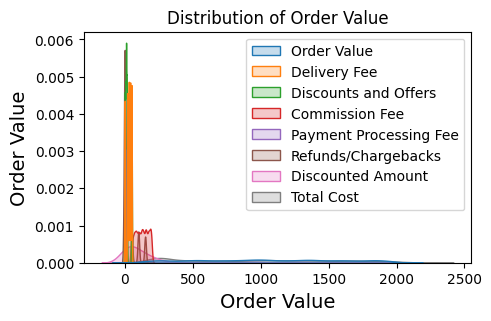

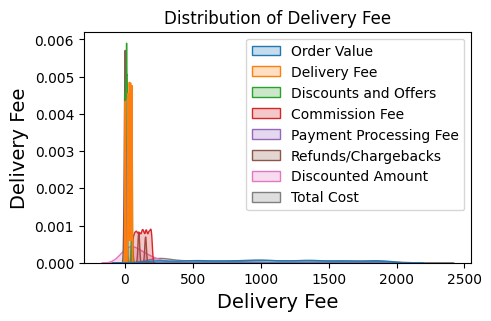

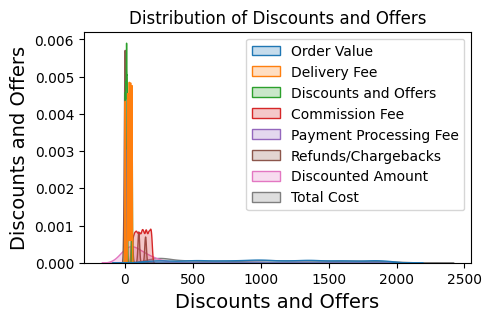

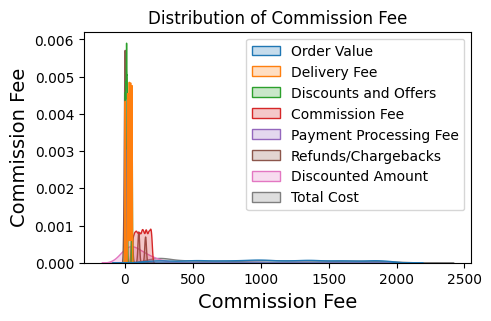

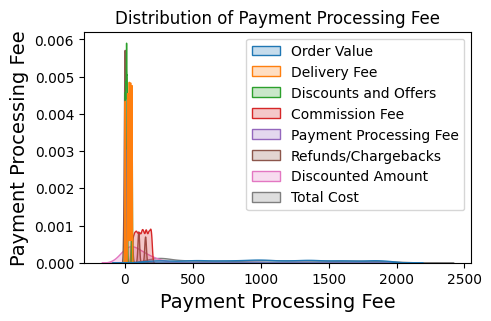

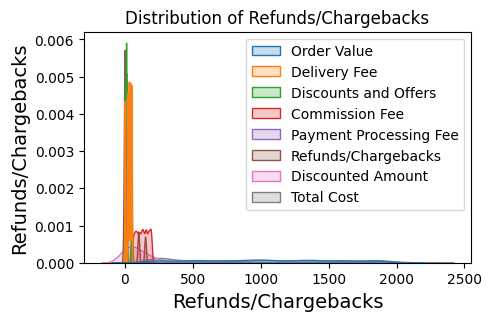

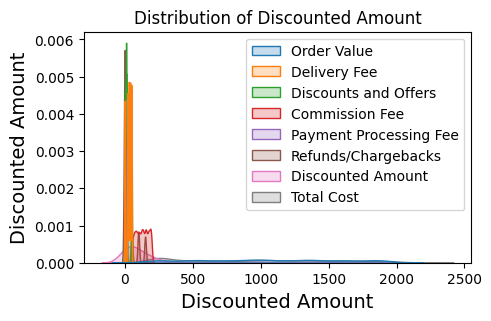

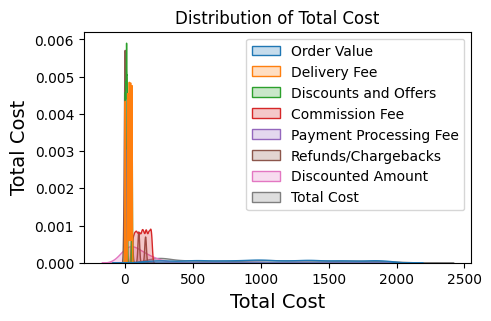

In [38]:
# Univariate Analysis

for feature in numerical_features:
  plt.figure(figsize = (5,3))

  sns.kdeplot(data_update[numerical_features], shade=True, bw_adjust=0.5, color='r')
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature, fontsize = 14)
  plt.ylabel(feature, fontsize = 14)
  plt.show()